In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

import util.functions as funcs

np.random.seed = 10

[*********************100%***********************]  1 of 1 completed


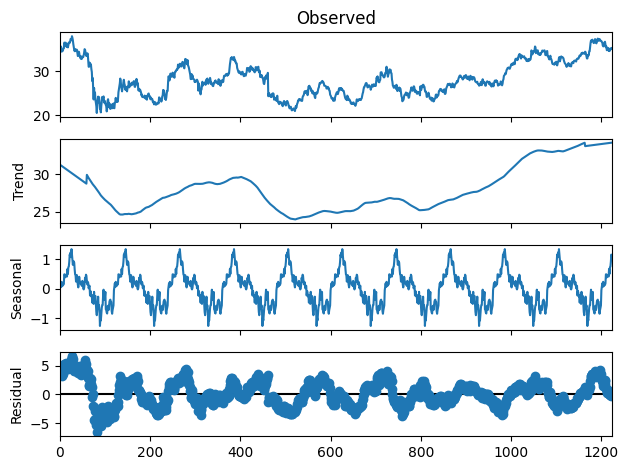

In [3]:
EMPRESA = 'ITUB4.SA'

df_full = funcs.get_data_ticker(EMPRESA, period='5y')
df = df_full.dropna()

dates, X, y = funcs.split_df_X_y(df)

result = seasonal_decompose(y, period=120, extrapolate_trend='freq')

metric = result.observed

result.plot()
plt.show()

In [8]:
data_hist = pd.DataFrame()
data_hist['metric'] = metric

data_hist['mm5'] = data_hist['metric'].rolling(5).mean()
data_hist['mm15'] = data_hist['metric'].rolling(15).mean()
data_hist['mm30'] = data_hist['metric'].rolling(30).mean()

data_hist = data_hist.dropna()

X = data_hist.iloc[:, 1:]
y = data_hist.iloc[:, 0]

scaler = StandardScaler()
#X = scaler.fit_transform(X)


pctTreino = .8

X_train, y_train = X[:int(len(X) * pctTreino)], y.iloc[:int(len(y) * pctTreino)]  
X_test, y_test = X[int(len(X) * pctTreino):], y.iloc[int(len(y) * pctTreino):]   

In [9]:
r2s = []
maes = []
mses = []

for i in range(1, 11):    
    i = i/10 #Tem que fazer isso pq o Python não aceita step decimal, ele tá indo de 0.1 a 1 com step de 0.1
    svr = SVR(C=i, kernel='poly')
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)    

    r2 = r2_score(y_pred=y_pred, y_true=y_test)
    mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
    mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
    
    r2s.append(r2)
    maes.append(mae)
    mses.append(mse)
    
    print(f"Parâmetro C = {i}")
    print(f"r2: {r2}\n")
    print(f"mae: {mae}\n")
    print(f"mse: {mse}\n")
    

# Valores para o eixo x 
x_values = [i * 0.1 for i in range(1, 11)]

plt.plot(x_values, r2s, label='R2')
plt.plot(x_values, maes, label='MAE')
plt.plot(x_values, mses, label='MSE')

# Adicionando rótulos aos eixos
plt.xlabel('Valores do parâmetro C')
plt.ylabel('Pontuações')
plt.title('Resultados das métricas')
plt.legend()  
plt.grid(True)
plt.show()  


Parâmetro C = 0.1
r2: 0.3770035575066307

mae: 1.0866493195497173

mse: 2.086633548526943

Parâmetro C = 0.2
r2: 0.36977059350698716

mae: 1.096115064109755

mse: 2.1108592813040676



KeyboardInterrupt: 

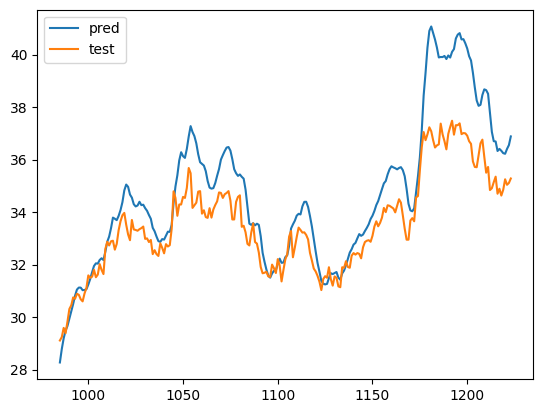

R2: 0.6866740439184555
MAE: 1.1829929723535964
MSE: 2.388344326541826


In [10]:
svr = SVR(kernel='poly', C=1)

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

# Alinha o índice de y_pred com o de y_test
y_pred = pd.Series(y_pred, index=y_test.index)

plt.plot(y_pred, label='pred')
plt.plot(y_test, label='test')
plt.legend()
plt.show()

print(f"R2: {r2_score(y_pred, y_test)}")
print(f"MAE: {mean_absolute_error(y_pred, y_test)}")
print(f"MSE: {mean_squared_error(y_pred, y_test)}")

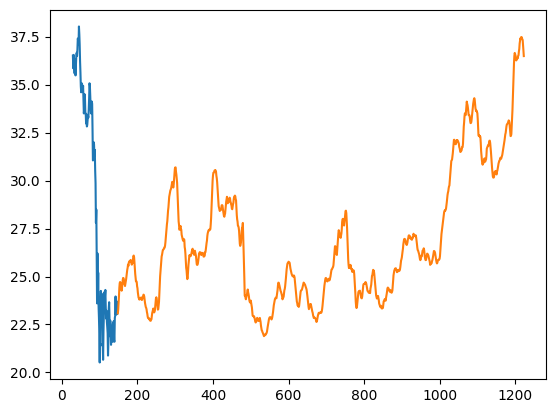

In [11]:
# Alinha o índice de y_pred com o de y_test
y_pred = pd.Series(y_pred, index=y_test.index)

plt.plot(y_train)
plt.plot(y_pred)

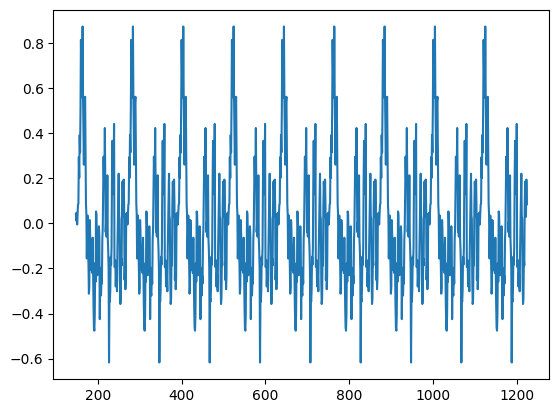

In [29]:
result_test = seasonal_decompose(y_test, period=120, extrapolate_trend='freq')
seasonal_test = result_test.seasonal

seasonal.plot()
plt.show()

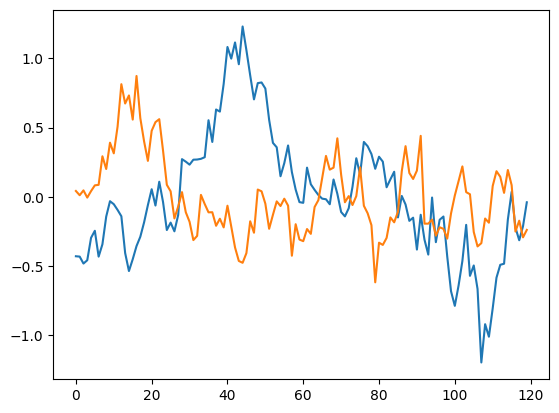

In [42]:
seasonal = result.seasonal

repeticao = funcs.find_repetition(seasonal)
repeticao_test = funcs.find_repetition(seasonal_test)

repeticao = pd.Series(repeticao, index=range(120))

repeticao_test.index = range(120)

plt.plot(repeticao)
plt.plot(repeticao_test)
plt.show()